# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fitto Martcellindo
- **Email:** fitomarcelindo602@gmail.com
- **ID Dicoding:** fitomarcel

## Menentukan Pertanyaan Bisnis

- Detail produk apa yang paling banyak terjual?
- dimana letak geografis yang memiliki pelanggan terbanyak?, Berapa rata-rata jumlah belanjaan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
from google.colab import drive
import os

## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

# Directory untuk file dataset
data_dir = "drive/MyDrive/dts_dicoding_new/"

# Daftar file dataset yang akan dibaca
files = {
    'orders': 'olist_orders_dataset.csv',
    'items': 'olist_order_items_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'payments': 'olist_order_payments_dataset.csv',
    'reviews': 'olist_order_reviews_dataset.csv',
    'customers': 'olist_customers_dataset.csv',
    'sellers': 'olist_sellers_dataset.csv',
    'geolocation': 'olist_geolocation_dataset.csv',
    'category': 'product_category_name_translation.csv'
}

# Membaca file dataset dengan error handling
data = {}

for name, filename in files.items():
    try:
        file_path = os.path.join(data_dir, filename)
        data[name] = pd.read_csv(file_path)
        print(f"Dataset '{name}' berhasil dimuat.")
    except FileNotFoundError:
        print(f"Error: File '{filename}' tidak ditemukan di {data_dir}.")
    except Exception as e:
        print(f"Error: Tidak dapat membaca file '{filename}'. Detail: {e}")

# Contoh akses dataset yang berhasil dimuat
if 'orders' in data:
    orders = data['orders']
    print("Contoh data dari 'orders':")
    print(orders.head())


Dataset 'orders' berhasil dimuat.
Dataset 'items' berhasil dimuat.
Dataset 'products' berhasil dimuat.
Dataset 'payments' berhasil dimuat.
Dataset 'reviews' berhasil dimuat.
Dataset 'customers' berhasil dimuat.
Dataset 'sellers' berhasil dimuat.
Dataset 'geolocation' berhasil dimuat.
Dataset 'category' berhasil dimuat.
Contoh data dari 'orders':
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2

In [ ]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

### Cleaning Data

In [ ]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [ ]:
datetime_columns = {
    'orders': ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
               "order_delivered_customer_date", "order_estimated_delivery_date"],
    'items': ["shipping_limit_date"],
    'reviews': ["review_creation_date", "review_answer_timestamp"]
}


for dataset, columns in datetime_columns.items():
    for column in columns:
        data[dataset][column] = pd.to_datetime(data[dataset][column])

duplicate

In [ ]:
duplicate_counts = {}
total_sample_counts = {}

for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)


duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])


pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
orders,99441,0
items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
sellers,3095,0
geolocation,1000163,261831
category,71,0


Cek Nilai hilang

In [ ]:
null_counts = {}

for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

In [ ]:
# prompt: Data Cleaning

# Handling Missing Values in 'orders' DataFrame
data['orders']['order_approved_at'].fillna(method='ffill', inplace=True)
data['orders']['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)
data['orders']['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

# Handling Missing Values in 'products' DataFrame
data['products'].dropna(subset=['product_category_name'], inplace=True)
data['products'].fillna(value={'product_name_lenght': data['products']['product_name_lenght'].mean(),
                             'product_description_lenght': data['products']['product_description_lenght'].mean(),
                             'product_photos_qty': data['products']['product_photos_qty'].mean(),
                             'product_weight_g': data['products']['product_weight_g'].mean(),
                             'product_length_cm': data['products']['product_length_cm'].mean(),
                             'product_height_cm': data['products']['product_height_cm'].mean(),
                             'product_width_cm': data['products']['product_width_cm'].mean()}, inplace=True)

# Handling Missing Values in 'sellers' DataFrame
# No action needed as no missing values are reported

# Handling Missing Values in 'reviews' DataFrame
data['reviews'].dropna(subset=['review_comment_message'], inplace=True)

# Recalculate null counts after handling missing values
null_counts = {}
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

orders 
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

reviews 
 review_id         

<ipython-input-515-343e6b39b571>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['orders']['order_approved_at'].fillna(method='ffill', inplace=True)
<ipython-input-515-343e6b39b571>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['orders']['order_approved_at'].fillna(method='ffill', inplace=True)
<ipython-input-515-343e6b39b571>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained ass

geolocation 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

category 
 product_category_name            0
product_category_name_english    0
dtype: int64 



Data Cleaning

In [ ]:
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [ ]:
print('Taking only delivered orders we still get ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% of data.')

Taking only delivered orders we still get 97.02% of data.


In [ ]:
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values


for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)


In [ ]:
for key, value in data.items():
    for col in value.columns:

        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

review_comment_title (%): 75.69247295327246


In [ ]:
print('There are only ' + str(data['orders'].order_delivered_customer_date.isnull().sum()) +
      ' orders that are missing delivery dates.')

There are only 0 orders that are missing delivery dates.


In [ ]:
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

# now filter every other dataframe where order_id is a foreign key
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)

In [ ]:
data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

column reviews

In [ ]:
print('Review cols: ' , data['reviews'].columns.values)

review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [ ]:
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

column Products

In [ ]:
print('Product cols: ' , data['products'].columns.values)


product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [ ]:
data['products']['product_category_name'].fillna(value='outro', inplace=True)

<ipython-input-526-10c255bb71c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_category_name'].fillna(value='outro', inplace=True)


In [ ]:
data['products']['product_category_name'].fillna(value='outro', inplace=True)

<ipython-input-527-10c255bb71c5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_category_name'].fillna(value='outro', inplace=True)


In [ ]:
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

<ipython-input-528-5b69cf93cb2e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_photos_qty'].fillna(value=0, inplace=True)


column Geo

In [ ]:
data['geolocation'].drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

Explore customers


In [ ]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
98970,0ba9a803b182db080870a20acb7a7a28,96748a84ed9d28e85ab479fd7fa1ea75,3348,sao paulo,SP
35375,ce730673fbb235448dccea069e34b64d,f22be5271ec9cfe6dc20790e61fe65b7,89266,jaragua do sul,SC
16256,45df6242306cd509d9ed9ca4a3209fdb,52745cc704843c99d35a08796b3b0007,18209,itapetininga,SP
86677,56d173fa525c87c279927cc4a62eba2f,6527831e04fc7df632155f984a31219a,21221,rio de janeiro,RJ
61220,26f1add6f6996118b1c61af5f11ef24e,53ae13d8626773704910dcc748998d7e,36950,ipanema,MG


In [ ]:
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Payments explore

In [ ]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
20066,a2b641f30be1e5a530738ffe99633544,1,boleto,1,86.73
24914,e1da6a380c23eec0e20231c7b695f47e,1,boleto,1,30.00
21383,343411396257f27dff4fe2c2a174fe98,1,credit_card,4,96.32
72929,03604d9c184f9290e997c49fb585b2b5,2,voucher,1,339.29
48504,654da57158d96035814657b5143bb11b,9,voucher,1,38.20


In [ ]:
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,74304
boleto,19191
voucher,3679
debit_card,1485


 Explore orders

In [ ]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
81870,cbcbf16b779a45730bd03de1dc68131b,1a7bab6bcb194aaba51c9e90c7d27340,delivered,2017-12-06 17:17:11,2017-12-06 18:21:15,2017-12-08 19:43:12,2018-01-12 22:17:40,2018-01-03,Late
63887,e412fc992ea2637ad4e76b34edd88a18,a1e66238cea795f0c30a76e9c5491bb8,delivered,2018-07-05 15:11:55,2018-07-05 16:08:18,2018-07-06 10:25:00,2018-07-13 18:19:45,2018-08-03,On Time
50991,605eab4c9d7b2b8aa7e4b8f8362146b5,c24770f0dd49a1205bf78ffa2c32adb0,delivered,2017-11-24 13:43:19,2017-11-25 03:33:28,2017-11-27 18:17:14,2017-12-11 20:41:30,2017-12-21,On Time
58236,bf5155dc24b8690b94d2a021bb3c5a9c,08028c13a908b120d56eff9d7ebd27c3,delivered,2017-06-12 18:34:07,2017-06-12 19:02:30,2017-06-19 17:43:38,2017-06-27 15:04:55,2017-07-12,On Time
7790,5e666f31a774ff904141886e1ef4e3d3,58ed7744a942602df913a5b6eed945c5,delivered,2017-05-30 18:19:31,2017-05-30 18:30:15,2017-05-31 10:38:50,2017-06-08 16:23:07,2017-06-30,On Time


In [ ]:
data['orders']['delivered_on_time'].describe()

,delivered_on_time
count,96478
unique,2
top,On Time
freq,88651


customer df

In [ ]:
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


Merge Coloumn

In [ ]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,NaN,NaN,NaN,NaT,NaT
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,NaN,NaN,NaN,NaT,NaT
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,NaN,NaN,NaN,NaT,NaT


In [ ]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50621,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33359,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40230,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48159,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83092,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
788,7db5f2eb8f5f54db9f9e71ba4296bcbf,2,voucher,1,0.01,05c95685d9d485889627e38c749ac65c,5.0,1.0,2017-06-15,2017-08-01 13:54:22
19348,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,NaN,NaN,NaN,NaT,NaT
97885,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,NaN,NaN,NaN,NaT,NaT
60911,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05


In [ ]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74304          0.01  13664.08
debit_card       1485         13.38   4445.50
voucher          3679          0.00   1839.05

merge coloumn

In [ ]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,NaN,NaN,NaN,NaT,NaT
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,NaN,NaN,NaN,NaT,NaT
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,NaN,NaN,NaN,NaT,NaT
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,NaN,NaN,NaN,NaT,NaT
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


In [ ]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,661
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50
ibitinga,49
guarulhos,48
santo andre,44
maringa,40


In [ ]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1769
PR,335
MG,236
SC,184
RJ,163
RS,125
GO,39
DF,30
ES,22


In [ ]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [ ]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


In [ ]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [ ]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
19948,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
71867,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48103,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
69823,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31346,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108613,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,43.0,258.0,3.0,6200.0,45.0,40.0,45.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
108690,17c7ec33a1657924ad493e6978b4bf91,bebes,31.0,594.0,6.0,950.0,22.0,20.0,28.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
108750,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,44.0,3364.0,1.0,50.0,16.0,16.0,11.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
108914,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,31.0,437.0,2.0,100.0,65.0,11.0,11.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3804   4.90  1699.99
watches_gifts                     5495   8.99  3999.90

[71 rows x 3 columns]

In [ ]:
data['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
974391,95900,-29.461478,-51.965369,lajeado,RS
72610,4046,-23.610977,-46.637920,sao paulo,SP
623693,37014,-21.554617,-45.441555,varginha,MG
15457,1453,-23.583436,-46.686463,são paulo,SP
327691,14020,-21.208522,-47.798121,ribeirão preto,SP


In [ ]:
data['geolocation'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [ ]:
data['geolocation'][data['geolocation']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


merge all column

In [ ]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,15.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,13.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,12.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,30.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [ ]:
all_data_df = all_data.drop_duplicates('order_id')

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96479 entries, 0 to 2215771
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96479 non-null  object        
 1   customer_unique_id             96479 non-null  object        
 2   customer_zip_code_prefix       96479 non-null  int64         
 3   customer_city                  96479 non-null  object        
 4   customer_state                 96479 non-null  object        
 5   order_id                       96478 non-null  object        
 6   order_status                   96478 non-null  object        
 7   order_purchase_timestamp       96478 non-null  datetime64[ns]
 8   order_approved_at              96478 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96478 non-null  datetime64[ns]
 10  order_delivered_customer_date  96478 non-null  datetime64[ns]
 11  order_estimated_de

In [ ]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40501,7396712.50
RJ,12350,2687999.38
MG,11354,2281133.99
RS,5345,1102148.13
PR,4923,1030941.12
BA,3256,770519.25
SC,3546,766683.23
GO,1957,493050.54
DF,2080,421849.29


In [ ]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3804          1.0  5.0
watches_gifts                     5495          1.0  5.0

[71 rows x 3 columns]

In [ ]:
output_csv_path = "drive/MyDrive/dts_dicoding_new/df.csv"

all_data_df.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Detail produk apa yang paling banyak terjual?


In [ ]:
items_product = data['items'].merge(data['products'], on= 'product_id', how= 'inner')
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

product_revenue = orders_ip.pivot_table(index=['product_id'], aggfunc= {'order_item_id': 'sum', 'price':'mean'})
product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']
product_revenue.rename(columns={'order_item_id':'sell_probability'}, inplace= True)
product_revenue['sell_probability'] = product_revenue['sell_probability'] / len(product_revenue)
product_revenue.sort_values(by='total', ascending= False)

,sell_probability,price,total
product_id,,,
bb50f2e236e5eea0100680137654686c,0.006765,327.628866,70112.577320
5769ef0a239114ac3a854af00df129e4,0.001138,1680.000000,60480.000000
6cdd53843498f92890544667809f1595,0.005090,350.668627,56457.649020
d1c427060a0f73f6b889a5c7c61f2ac4,0.011286,137.411325,49055.843133
99a4788cb24856965c36a24e339b6058,0.016787,88.154423,46809.998868
...,...,...,...
8a3254bee785a526d548a81a9bc3c9be,0.000126,0.850000,3.400000
2e8316b31db34314f393806fd7b6e185,0.000032,2.990000,2.990000
680cc8535be7cc69544238c1d6a83fe8,0.000032,2.900000,2.900000


### Pertanyaan 2:

In [ ]:
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)

fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])

plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12)
plt.ylabel('Log Product Price', fontsize=12)

plt.xlim(-11, -3)
plt.ylim(0, 9)

plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)
plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)

# Use different colormaps and set the number of grids
hb = ax.hexbin(x, y, gridsize=14, C=product_revenue.total, reduce_C_function=np.sum, cmap='cividis')

# Added colorbar
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue (R$)', rotation=270, labelpad=20, fontsize=12)

# Customize the layout and save the image
plt.tight_layout()
plt.savefig('drive/MyDrive/dataset_submision_dicoding/product_probability_sum_custom.png', dpi=300)

plt.show()

## Analisis Lanjutan (Opsional)

dimana letak geografis yang memiliki pelanggan terbanyak?, Berapa rata-rata jumlah belanjaan pelanggan?

In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


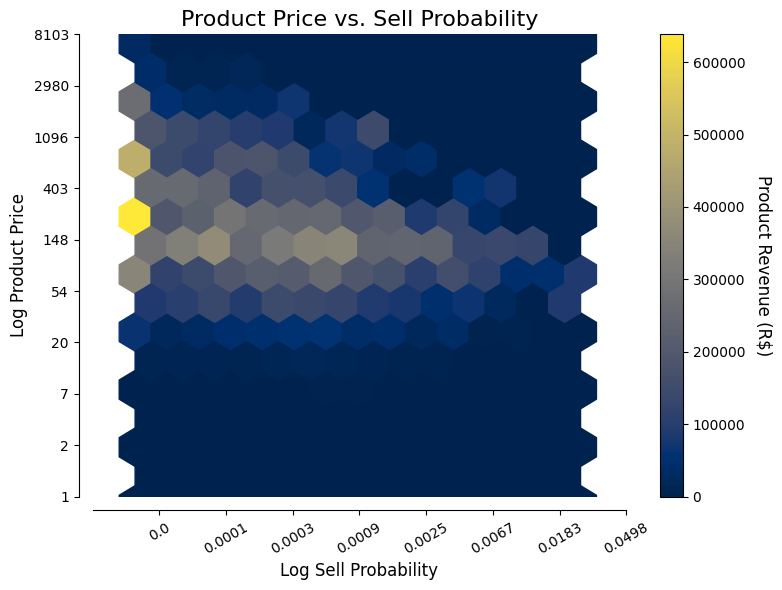

In [ ]:
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)

fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])

plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12)
plt.ylabel('Log Product Price', fontsize=12)

plt.xlim(-11, -3)
plt.ylim(0, 9)

plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)
plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)

# Use different colormaps and set the number of grids
hb = ax.hexbin(x, y, gridsize=14, C=product_revenue.total, reduce_C_function=np.sum, cmap='cividis')

# Added colorbar
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue (R$)', rotation=270, labelpad=20, fontsize=12)

# Customize the layout and save the image
plt.tight_layout()
plt.savefig('drive/MyDrive/dts_dicoding/product_probability_sum_custom.png', dpi=300)

plt.show()

In [ ]:
pay_ord_cust = orders.merge(data['payments'], on='order_id', how='outer').merge(data['customers'], on='customer_id', how='outer')
customer_spent = pay_ord_cust.groupby('customer_unique_id').agg({'payment_value': 'sum'}).sort_values(by='payment_value', ascending=False)

# calculating mean customer spent and standard deviation
customer_mean = customer_spent['payment_value'].mean()
customer_std = stats.sem(customer_spent['payment_value'])

# estimating population average from sample
stats.t.interval(0.95, loc=customer_mean, scale= customer_std, df= len(customer_spent)- 1)

# estimate mean and confidence interval for customers in each region
customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})
customer_regions.reset_index(inplace=True)

cis = stats.t.interval(.95, loc=customer_regions['payment_value']['mean'], scale=customer_regions['payment_value']['std']/np.sqrt(customer_regions['customer_unique_id']['count']), df= customer_regions['customer_unique_id']['count'] -1)

customer_regions['ci_low'] = cis[0]
customer_regions['ci_hi'] = cis[1]


<ipython-input-558-2294fafae49c>:12: FutureWarning: The provided callable <function mean at 0x79dfe9bf95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})
<ipython-input-558-2294fafae49c>:12: FutureWarning: The provided callable <function std at 0x79dfe9bf96c0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value':[np.mean, np.std], 'customer_unique_id':'count'})


In [ ]:
print(data['geolocation'].columns)

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


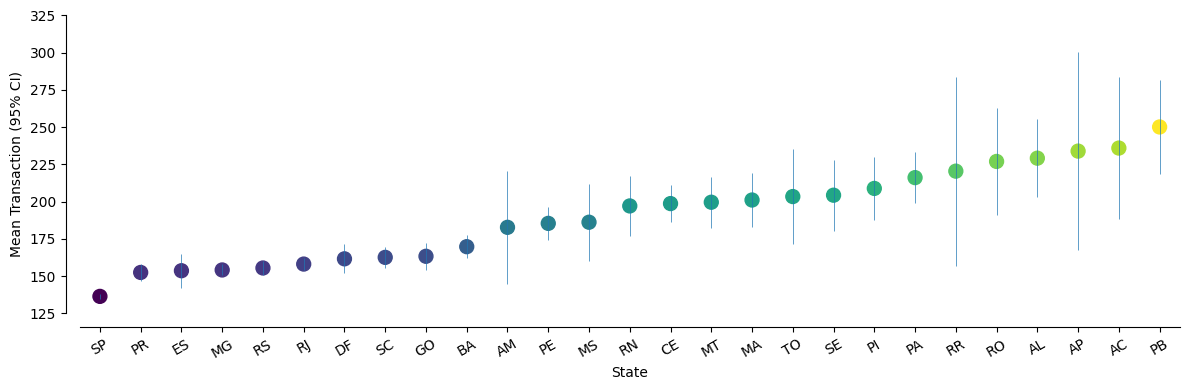

In [ ]:
def default_plot(ax, spines):
    ax = plt.gca()
    # Remove unnecessary axes and ticks (top and bottom)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # Set the ticks facing OUTWARD
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    # Remove grid
    #ax.grid('off')

    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')

    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax

# sort ascendingly for easier to read plot
plot = customer_regions.sort_values(by=('payment_value', 'mean'))

# make figure
fig, ax = plt.subplots(figsize= (12, 4))
ax = default_plot(ax, ['left', 'bottom'])
plt.xticks(rotation= 30)
plt.xlabel('State')
plt.ylabel('Mean Transaction (95% CI)')
plt.xlim(-0.5, 26.5)
plt.ylim(125, 325)
plt.scatter(plot['customer_state'], plot['payment_value']['mean'], s=100, c=plot['payment_value']['mean'])
plt.vlines(plot['customer_state'], plot['ci_low'], plot['ci_hi'], lw=.5)
plt.tight_layout()
plt.savefig('drive/MyDrive/dts_dicoding_new/customers_ci.png', dpi= 300)


In [ ]:
other_state_geolocation = data['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)


In [ ]:
geolocation_silver = data['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [ ]:
print(data['geolocation'].dtypes)

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


In [ ]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [ ]:
customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,NaN,NaN,NaN,NaT,NaT,14409,franca,SP,-20.502307,-47.396740
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,NaN,NaT,NaT,9790,sao bernardo do campo,SP,-23.731211,-46.541206
2,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,NaN,NaT,NaT,9790,são bernardo do campo,SP,-23.727018,-46.543192
3,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,NaN,NaT,NaT,1151,sao paulo,SP,-23.531294,-46.657039
4,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,NaN,NaT,NaT,1151,são paulo,SP,-23.531294,-46.656866
5,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,NaN,NaN,NaN,NaT,NaT,8775,mogi das cruzes,SP,-23.499025,-46.183436
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52,13056,campinas,SP,-22.974331,-47.142173
7,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,9a6614162d285301aa3ef6de4be75265,5.0,1.0,2017-09-29,2017-10-01 21:52:53,89254,jaragua do sul,SC,-26.471435,-49.114562
8,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,9a6614162d285301aa3ef6de4be75265,5.0,1.0,2017-09-29,2017-10-01 21:52:53,89254,jaraguá do sul,SC,-26.470583,-49.113512
9,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,NaN,NaN,NaN,NaT,NaT,4534,sao paulo,SP,-23.583998,-46.673524


In [ ]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [ ]:
customers_silver.to_csv("drive/MyDrive/dts_dicoding_new/geolocation.csv", index=False)

In [ ]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='yellow')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

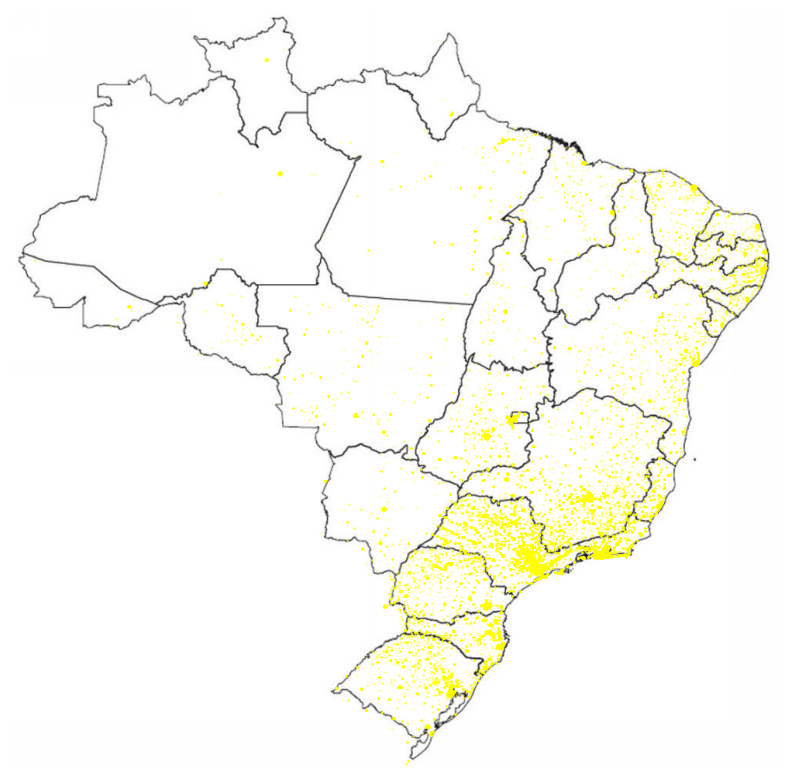

In [ ]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2